In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
df = pd.read_csv('problem1.csv')
a = np.array(df)
df

,X_training,Y_training,X_test,Y_test
0,-2.00,22.067387,2.00,6.024049
1,-1.97,19.944915,2.05,6.885408
2,-1.94,18.062490,2.10,7.578968
3,-1.91,16.384313,2.15,8.439467
4,-1.88,14.567798,2.20,9.554611
...,...,...,...,...
129,1.87,4.925350,NaN,NaN
130,1.90,5.064481,NaN,NaN
131,1.93,5.154600,NaN,NaN
132,1.96,5.442464,NaN,NaN


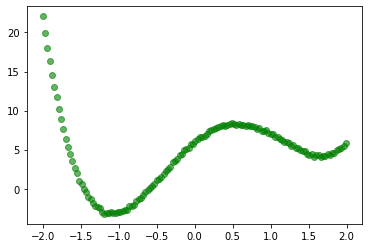

In [3]:
X_training=df['X_training']
Y_training=df['Y_training']
plt.scatter(X_training,Y_training,c='green', alpha=0.6)

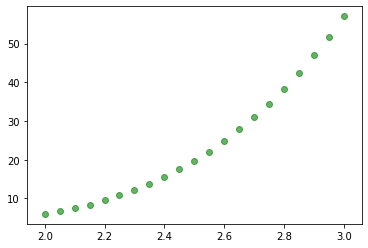

In [4]:
X_test=df['X_test']
Y_test=df['Y_test']
plt.scatter(X_test,Y_test,c='green', alpha=0.6)

In [5]:
import math
def AIC(Y_test,yvals_test):
    resid = Y_test - yvals_test
    sse = sum(resid**2)
    k=2
    AICValue = 2*k-2*math.log(sse)
    print("AICValue is :", AICValue)

In [61]:
#Fitting function
def fun(x,y,n):
    #TRAIN
    f = np.polyfit(x, y, n)
    print('f is :\n',f)
    p = np.poly1d(f)
    print('p is :\n',p)
    yvals = p(x)
    
    
    plt.figure(50)
    plt.subplot(211)
    plot1 = plt.scatter(x,y,c='green', alpha=0.3,marker='>',label='orgl')
    plot2 = plt.plot(x,yvals, 'r',label='fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc=4)
    plt.title('polyfit-training')
    plt.show()

    
    #TEST
    yvals_test= p(X_test)
    
    plt.subplot(212)
    plot1 = plt.scatter(X_test,Y_test, c='g',label='orgl',alpha=0.3,marker='>')
    plot2 = plt.plot(X_test,yvals_test, 'r',label='fit')
    plt.xlabel('X_test')
    plt.ylabel('Y_test')
    plt.legend(loc=4)
    plt.title('polyfit-testing')
    plt.show()

    #we only have 21 test, so in this way 'NAN' would not occur
    #AIC
    yvals_test_real = yvals_test[0:21]
    Y_test_real = Y_test[0:21]

    AIC(Y_test_real,yvals_test_real)

f is :
 [0.700196   4.47055938]
p is :
  
0.7002 x + 4.471


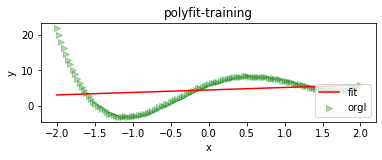

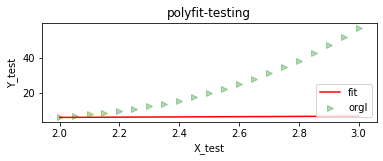

AICValue is : -14.709856714526069


In [62]:
fun(X_training,Y_training,1)

f is :
 [0.96396984 0.7098357  3.1724776 ]
p is :
        2
0.964 x + 0.7098 x + 3.172


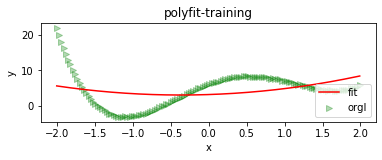

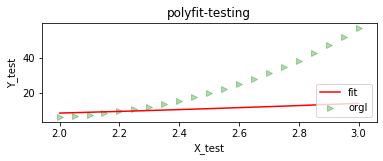

AICValue is : -13.858767043164907


In [63]:
fun(X_training,Y_training,2)

f is :
 [-3.04861233  0.91824065  8.09866596  3.20942252]
p is :
         3          2
-3.049 x + 0.9182 x + 8.099 x + 3.209


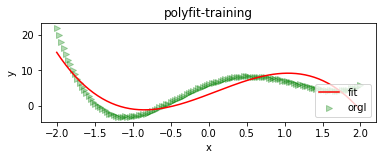

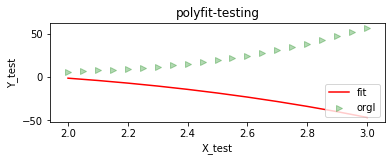

AICValue is : -17.984259929676103


In [64]:
fun(X_training,Y_training,3)

f is :
 [ 1.99588109 -3.00869471 -5.99141415  8.02956741  6.0000592 ]
p is :
        4         3         2
1.996 x - 3.009 x - 5.991 x + 8.03 x + 6


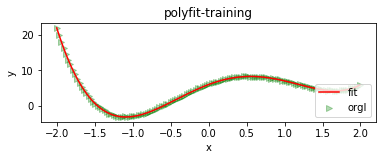

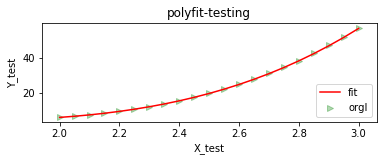

AICValue is : 3.9325697452195887


In [65]:
fun(X_training,Y_training,4)

f is :
 [ 4.81683598e-04  1.99589313e+00 -3.01085603e+00 -5.99144657e+00
  8.03143761e+00  6.00006855e+00]
p is :
            5         4         3         2
0.0004817 x + 1.996 x - 3.011 x - 5.991 x + 8.031 x + 6


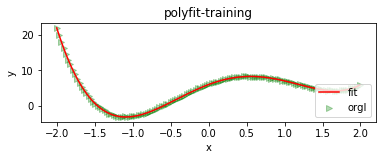

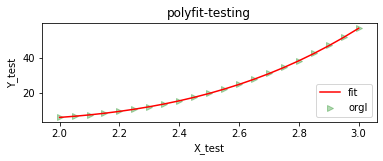

AICValue is : 4.441775596938452


In [66]:
fun(X_training,Y_training,5)

f is :
 [ 4.81683598e-04  1.99589313e+00 -3.01085603e+00 -5.99144657e+00
  8.03143761e+00  6.00006855e+00]
p is :
            5         4         3         2
0.0004817 x + 1.996 x - 3.011 x - 5.991 x + 8.031 x + 6


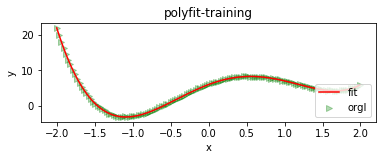

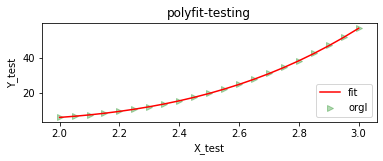

AICValue is : 4.441775596938452


In [67]:
fun(X_training,Y_training,5)

In [68]:
#Cross validate

In [69]:
from sklearn.model_selection import train_test_split


In [74]:
def Cross_validate_fun(x,y,n):
    
    #must 'shuffle=False'
    train_X, test_X, train_Y, test_Y = train_test_split(x,y,test_size=0.2,shuffle=False)
    
    #TRAIN
    f = np.polyfit(train_X, train_Y, n)
    print('f is :\n',f)
    p = np.poly1d(f)
    print('p is :\n',p)
    yvals = p(train_X)
     
    
    plt.figure(50)
    plt.subplot(211)
    plot1 = plt.scatter(train_X,train_Y, c='green', alpha=0.3,marker='>',label='orgl')
    plot2 = plt.plot(train_X,yvals, 'r',label='fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc=4)
    plt.title('polyfit-training')
    plt.show()

    
    #TEST
    yvals_test= p(test_X)
    
    plt.subplot(212)
    plot1 = plt.scatter(test_X,test_Y, c='g',label='orgl',alpha=0.3,marker='>')
    plot2 = plt.plot(test_X,yvals_test, 'r',label='fit')
    plt.xlabel('test_X')
    plt.ylabel('test_Y')
    plt.legend(loc=4)
    plt.title('polyfit-testing')
    plt.show()

    AIC(test_Y,yvals_test)

f is :
 [-6.28419948 -3.60483005 11.08927193  5.55079815]
p is :
         3         2
-6.284 x - 3.605 x + 11.09 x + 5.551


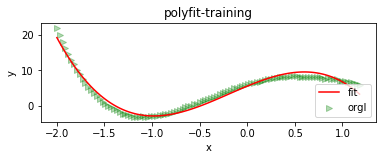

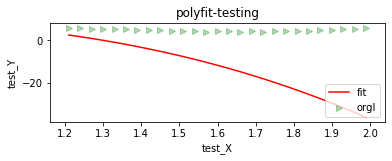

AICValue is : -14.902310833142671


In [75]:
Cross_validate_fun(X_training,Y_training,3)

f is :
 [ 1.99587187 -3.01096961 -5.99705356  8.02718877  6.00091669]
p is :
        4         3         2
1.996 x - 3.011 x - 5.997 x + 8.027 x + 6.001


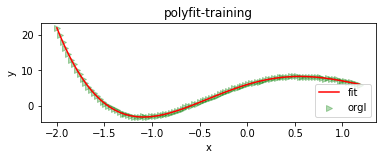

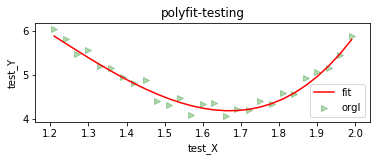

AICValue is : 6.079365716399101


In [76]:
Cross_validate_fun(X_training,Y_training,4)

f is :
 [ 7.76494802e-03  2.01179001e+00 -3.02012837e+00 -6.01902219e+00
  8.02933655e+00  6.00449912e+00]
p is :
           5         4        3         2
0.007765 x + 2.012 x - 3.02 x - 6.019 x + 8.029 x + 6.004


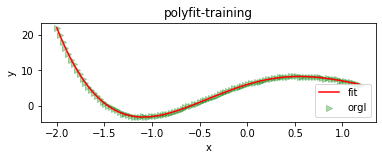

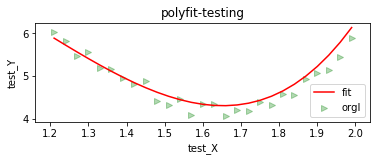

AICValue is : 4.42246510511225


In [77]:
Cross_validate_fun(X_training,Y_training,5)

f is :
 [ 0.01724555  0.05018899  1.99474984 -3.09561746 -6.02083958  8.05642253
  6.00523675]
p is :
          6           5         4         3         2
0.01725 x + 0.05019 x + 1.995 x - 3.096 x - 6.021 x + 8.056 x + 6.005


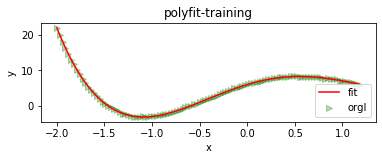

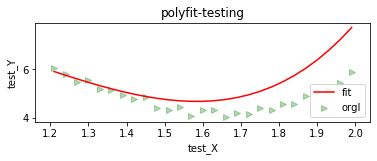

AICValue is : -1.836859092198198


In [78]:
Cross_validate_fun(X_training,Y_training,6)

f is :
 [-0.03048709 -0.0702524   0.06927274  2.18095556 -3.06093632 -6.12316637
  8.04093792  6.01379507]
p is :
           7           6           5         4         3         2
-0.03049 x - 0.07025 x + 0.06927 x + 2.181 x - 3.061 x - 6.123 x + 8.041 x + 6.014


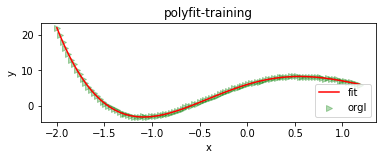

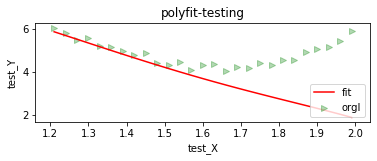

AICValue is : -4.398077880015197


In [79]:
Cross_validate_fun(X_training,Y_training,7)

f is :
 [-0.02169899 -0.10165979 -0.06821703  0.24177757  2.24615797 -3.18486663
 -6.1655218   8.06447686  6.01689071]
p is :
          8          7           6          5         4         3
-0.0217 x - 0.1017 x - 0.06822 x + 0.2418 x + 2.246 x - 3.185 x
          2
 - 6.166 x + 8.064 x + 6.017


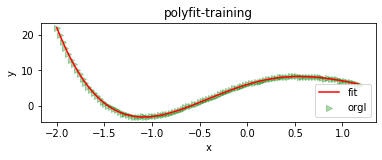

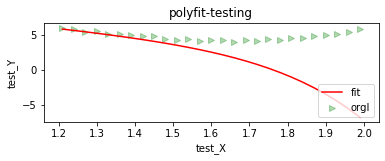

AICValue is : -8.97057898337346


In [80]:
Cross_validate_fun(X_training,Y_training,8)